# <center> **Daily Insights For Covid19 Pandemic** <center>
#### <center> **(Updated Daily)** <center>

Coronaviruses are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 [<sup>[1]</sup>](https://www.who.int/news-room/q-a-detail/q-a-coronaviruses)

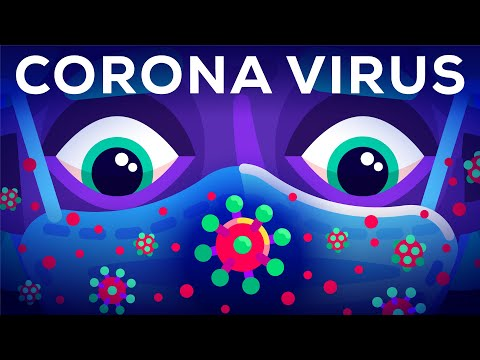

In [39]:
from IPython.display import YouTubeVideo

YouTubeVideo('BtN-goy9VOY', width=500, height=300)

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import gif

## **Data**

The Data consist of records of daily confirmed, recovered and death cases from every country and is updated on daily basis. The data repositary is maintained by **Johns Hopkins CSSE** and is available on [GitHub](https://github.com/CSSEGISandData/COVID-19)

In [41]:
confirmed = pd.read_csv('/home/nabeelhasan/Git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
confirmed.rename(columns= {"Country/Region" : "Country",
                           "Province/State" : "Province"}, inplace = True)
death = pd.read_csv('/home/nabeelhasan/Git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
death.rename(columns= {"Country/Region" : "Country",
                           "Province/State" : "Province"}, inplace = True)
recovered = pd.read_csv('/home/nabeelhasan/Git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
recovered.rename(columns= {"Country/Region" : "Country",
                           "Province/State" : "Province"}, inplace = True)

## **Worldwide Cases of Spread**

In [42]:
covid_19_cases = pd.DataFrame({'Confirmed' :confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().T.sum(axis = 1),
                               'Death' : death.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().T.sum(axis = 1),
                               'Recovered' :recovered.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().T.sum(axis = 1)})
covid_19_cases.index = pd.to_datetime(covid_19_cases.index)

In [43]:
covid_19_cases.tail().style.background_gradient(cmap='Reds')

,Confirmed,Death,Recovered
2020-03-18 00:00:00,214910,8733,83207
2020-03-19 00:00:00,242708,9867,84854
2020-03-20 00:00:00,272166,11299,87256
2020-03-21 00:00:00,304524,12973,91499
2020-03-22 00:00:00,335955,14632,97704


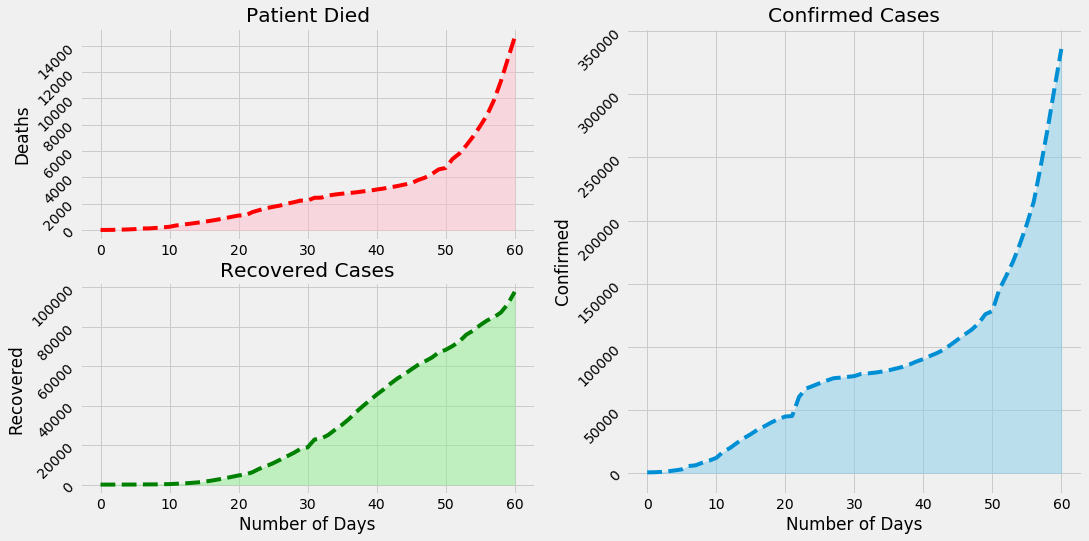

In [44]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize  = (16,8))
    ax1 = plt.subplot2grid(shape = (2,2), loc = (0,1), rowspan = 2, colspan = 1)
    ax1.plot( range(len(covid_19_cases.index)),covid_19_cases['Confirmed'],   linestyle = 'dashed', label = 'Confirmed' )
    ax1.fill_between( range(len(covid_19_cases.index)),covid_19_cases['Confirmed'], color="skyblue", alpha=0.5)
    ax1.tick_params(axis = 'y', labelrotation=45)
    ax1.set_title('Confirmed Cases')
    ax1.set_xlabel('Number of Days')
    ax1.set_ylabel('Confirmed')
    ax2 = plt.subplot2grid(shape = (2,2), loc = (0,0), rowspan = 1, colspan = 1)
    ax2.plot( range(len(covid_19_cases.index)) ,covid_19_cases['Death'], c = 'red', linestyle = 'dashed')
    ax2.fill_between( range(len(covid_19_cases.index)),covid_19_cases['Death'], color="pink", alpha=0.5)
    ax2.tick_params(axis = 'y',labelrotation=45)
    ax2.set_title('Patient Died')
    ax2.set_ylabel('Deaths')
    ax3 = plt.subplot2grid(shape = (2,2), loc = (1,0), rowspan = 1,  colspan = 1)
    ax3.plot( range(len(covid_19_cases.index)) ,covid_19_cases['Recovered'], c = 'green' ,linestyle = 'dashed')
    ax3.fill_between( range(len(covid_19_cases.index)),covid_19_cases['Recovered'], color="lightgreen", alpha=0.5)
    ax3.tick_params(axis = 'y',labelrotation=45)
    ax3.set_title('Recovered Cases')
    ax3.set_xlabel('Number of Days')
    ax3.set_ylabel('Recovered')

From the data we can see that the number of confirmed cases rose exponentially over the span of sixty days , The number of recovered patients seems to be stable and rising but the number of deaths are skyrocketing for last ten days as this pandemic spread in Western Hemisphere. This shows us how rapidly corona virus spread. Below there is an animation to give the idea of extent of spread in different countries and which countries are hardest hit by Covid19.  

In [45]:
@gif.frame
def plot(a):
    fig = plt.gcf()
    fig.set_size_inches(15, 12)
    m = Basemap(projection='mill', 
            llcrnrlat=-80, urcrnrlat=80, 
            llcrnrlon=-180, urcrnrlon=180, 
            lat_ts=20, 
            resolution='l')
    m.drawcoastlines(color='black', linewidth=0.5)
    m.drawcountries(color='black', linewidth=0.5)
    x, y = m(np.array(confirmed['Long']), np.array(confirmed['Lat']))
    plt.scatter( x,  y,s = (confirmed[f'{a}'])*0.05, c = confirmed[f'{a}'], cmap = 'rainbow', alpha = 0.7, edgecolor = 'grey',linewidth = 1.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(' Worldwide \n Spread on {}'.format(a), fontsize=14, fontweight='bold')
    
frames = []
for i in confirmed.columns[4:]: 
    frame = plot(i)
    frames.append(frame)

gif.save(frames, "Animated_Objects/worldwide.gif", duration = 250)

![Alt Text](Animated_Objects/worldwide.gif)

## **Major countries with most number of Covid19 cases**

In [46]:
major = confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().iloc[:, -1].sort_values(ascending=False)[0:9]
major = major.to_frame()
major.rename(columns = {major.columns[0]: 'Confirmed'}, inplace = True)
major['Death'] = death.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[(major.index), death.columns[-1]]
major['Recoverd'] = recovered.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[(major.index), recovered.columns[-1]]
major.style.background_gradient(cmap='cool')

,Confirmed,Death,Recoverd
Country,,,
China,81397,3265,72362
Italy,59138,5476,7024
US,33272,417,0
Spain,28768,1772,2575
Germany,24873,94,266
Iran,21638,1685,7931
France,16176,674,2206
"Korea, South",8897,104,2909
Switzerland,7245,98,131


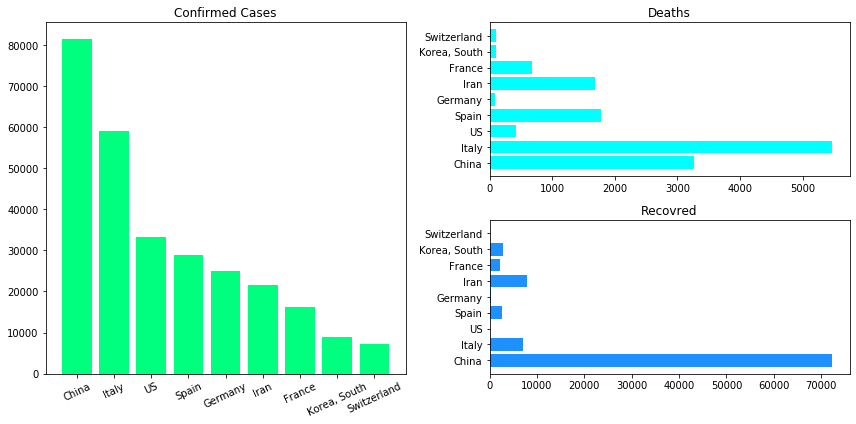

In [47]:
fig = plt.figure(figsize = (12, 6))
ax1 = plt.subplot2grid(shape = (2,2), loc= (0,0), rowspan = 2, colspan = 1)
ax1.bar(major.index, major['Confirmed'], color = 'springgreen' )
ax1.tick_params(axis = 'x', labelrotation=25)
ax1.set_title('Confirmed Cases')
ax2 = plt.subplot2grid(shape = (2,2), loc = (0,1), rowspan = 1, colspan = 1)
ax2.barh( major.index, major['Death'], color = 'aqua')
ax2.tick_params(axis = 'y', labelrotation=0)
ax2.set_title('Deaths')
ax3 = plt.subplot2grid(shape = (2,2), loc = (1,1), rowspan = 1, colspan = 1)
ax3.barh(major.index, major['Recoverd'], color = 'dodgerblue')
ax3.tick_params(axis = 'y', labelrotation=0)
ax3.set_title('Recovred')
plt.tight_layout()

## **Trajectory Of Spread in major countries**

Cases have stablised in **China** and **South Korea** 

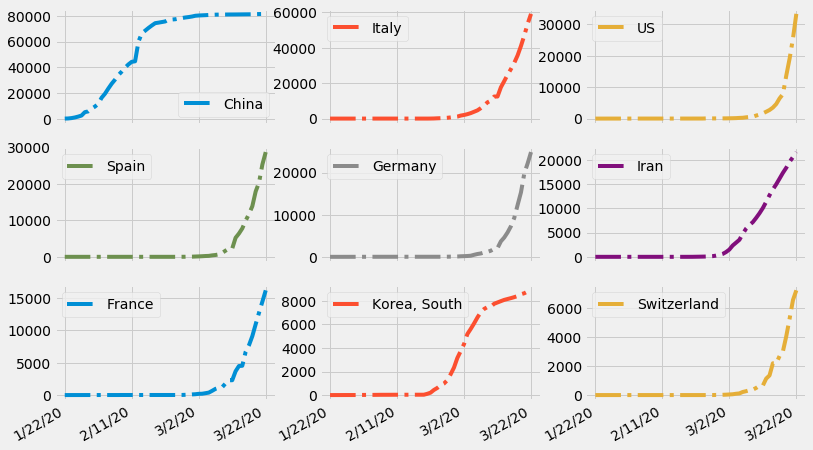

In [48]:
df_09 = confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[major.index].T
with plt.style.context('fivethirtyeight'):
    df_09.plot(subplots = True, layout = (3,3), linestyle = 'dashdot', figsize = (12,8));

## **Momentum of spread (based on rolling mean)**

**This figure shows the number of cases grow based on five day rolling mean** This give us the current strenght of spread. 
1. We can see cases in China and Korea have very low momentum now
2. Italy's momentum is growing weak but still quit high
3. Iran also show downward trend but still have very high momentum of spread
4. European countries except of Italy have still high spread rate.
5. United States currently have very high momentum of spread as test show new cases every day

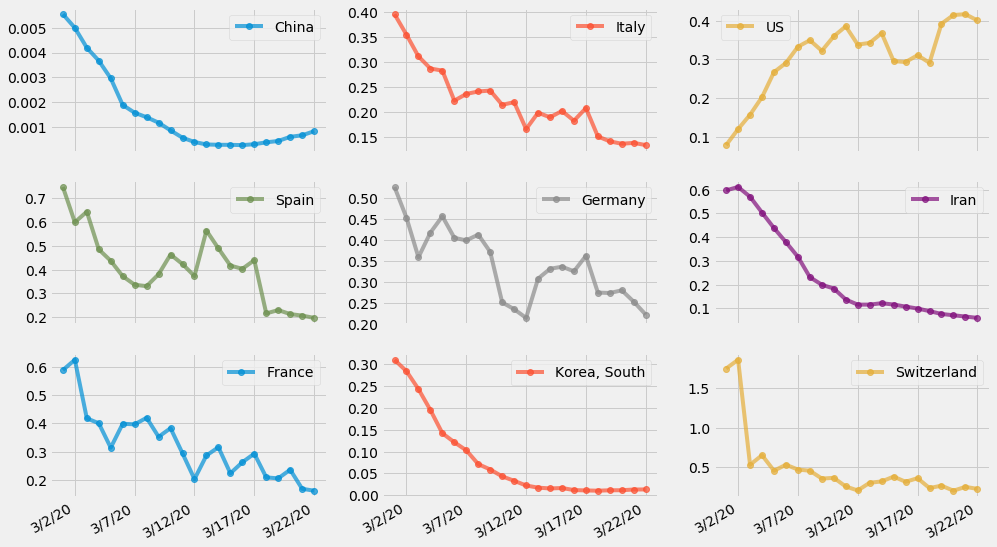

In [49]:
with plt.style.context('fivethirtyeight'):
    df_09.pct_change().replace(np.inf, np.nan).dropna().rolling(5).mean().plot(subplots = True,
                                                                               layout = (3,3), marker = 'o', alpha = 0.7, figsize = (15,10));

## **A Model for Spread of Covid19**

This is a great explaination by **Grant Sanderson** from [3blue1brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw). He is certainly a math genius and have an amazing capability of visualizing mathematical concepts

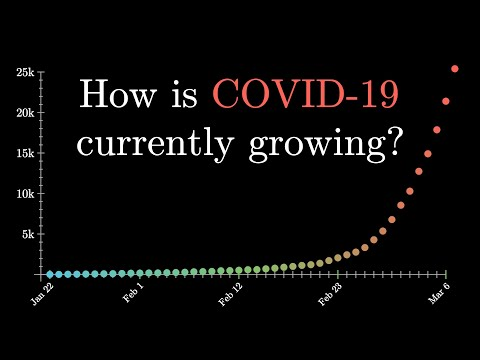

In [50]:
YouTubeVideo('Kas0tIxDvrg', width=500, height=300)

## **Analysis of Covid19 cases in China**

In [51]:
China = confirmed[confirmed['Country'] == 'China']
China = China.set_index('Province')

In [ ]:
@gif.frame
def plot(a):
    fig = plt.gcf()
    fig.set_size_inches(15, 12)
    m = Basemap(projection='mill', 
            llcrnrlat=15, urcrnrlat=55, 
            llcrnrlon=70, urcrnrlon=135, 
            lat_ts=20, 
            resolution='l')
    m.drawcoastlines(color='black', linewidth=0.5)
    m.drawcountries(color='black', linewidth=0.5)
    x, y = m(np.array(China['Long']), np.array(China['Lat']))
    plt.scatter( x,  y,s = (China[f'{a}'])*0.10, c = China[f'{a}'], cmap = 'rainbow', alpha = 0.7, edgecolor = 'grey',linewidth = 1.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('China \n Spread on {}'.format(a), fontsize=14, fontweight='bold')
    
frames = []
for i in confirmed.columns[4:]: 
    frame = plot(i)
    frames.append(frame)

gif.save(frames, "Animated_Objects/china.gif", duration = 250)

![Alt Text](Animated_Objects/china.gif)

### **Provincial Data from China**

As **Grant Sanderson** explained in his video once virus started to reach the true population we will observe a Logistic curve. Right now the Chinese government effort of complete lockdown have helped this effort to reach this level very quickly. But this should be taken with sound of caution as China reopens it cities this might spread again. So containment efforts should remain in place as long as we don't see any rapid imporovements in the situation  

In [ ]:
with plt.style.context('fivethirtyeight'):
    China.drop(columns = ['Country', 'Lat', 'Long']).T.plot(subplots = True, 
                                                            layout = (11,3), linestyle = (0, (3,1,1,1)), figsize = (15,28));


## **Analysis of Covid19 cases in US**

In [ ]:
US = confirmed[confirmed['Country'] == 'US']
US = US.set_index('Province')

In [ ]:
US.drop(columns = ['Country', 'Lat', 'Long']).iloc[0:52, -1].sort_values(ascending =
                                                                         False).to_frame()[0:10].style.background_gradient(cmap='Reds')

In [ ]:
@gif.frame
def plot(a):
    fig = plt.gcf()
    fig.set_size_inches(15, 12)
    m = Basemap(projection='mill', 
            llcrnrlat=22, urcrnrlat=51, 
            llcrnrlon=-130, urcrnrlon=-65, 
            lat_ts=20, 
            resolution='l')
    m.drawcoastlines(color='black', linewidth=0.5)
    m.drawcountries(color='black', linewidth=0.5)
    x, y = m(np.array(US['Long']), np.array(US['Lat']))
    plt.scatter( x,  y,s = (US[f'{a}']), c = US[f'{a}'], cmap = 'rainbow', alpha = 0.7, edgecolor = 'grey',linewidth = 1.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('US \n Spread on {}'.format(a), fontsize=14, fontweight='bold' )
    
frames = []
for i in confirmed.columns[4:]: 
    frame = plot(i)
    frames.append(frame)

gif.save(frames, "Animated_Objects/eusa.gif", duration = 250)

![Alt text](Animated_Objects/eusa.gif)

Since the virus is in early stages of spread we are seeing an exponential increase in numbers of Covid19 patients in US. This number will continue to rise as more test are done to find new cases in the country. Rapid containment efforts are required in US to slow the spread of diseases. Hardest hit areas are
1. **New York**
2. **Washington**
3. **California**

In [ ]:
with plt.style.context('fivethirtyeight'):
    US.drop(columns = ['Country', 'Lat', 'Long']).iloc[0:52, 30:].T.plot(subplots = True, 
                                                            layout = (13,4), linestyle = (0, (3,1,1,1)), figsize = (15,30));